<a href="https://colab.research.google.com/github/leejunho12316/HonGongMachine/blob/main/AICE_Chapter09_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from sklearn.cluster import KMeans
import numpy as np

X= np.array([[1,2],[1,4],[1,0],[10,2],[10,4],[10,0]])
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

print(kmeans.labels_)
print(kmeans.cluster_centers_)

[1 1 1 0 0 0]
[[10.  2.]
 [ 1.  2.]]


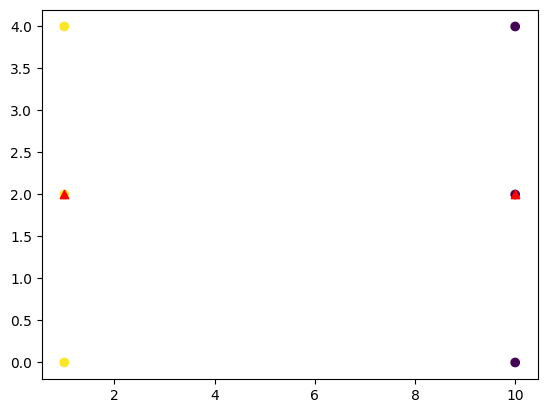

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='^')

In [13]:
kmeans.transform(X)

array([[9.        , 0.        ],
       [9.21954446, 2.        ],
       [9.21954446, 2.        ],
       [0.        , 9.        ],
       [2.        , 9.21954446],
       [2.        , 9.21954446]])

array([ 1,  1,  1, 10, 10, 10])

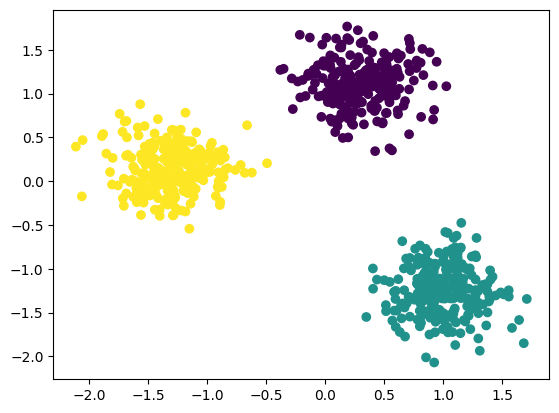

In [18]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
X, y = make_blobs(n_samples=750, centers = 3, cluster_std = 0.4, random_state = 0)
X = StandardScaler().fit_transform(X)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [36]:
import numpy as np
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10)
db.fit(X)

labels = db.labels_
print("DBSCAN labels : ", labels[:20], "......")
print("REAL labels : \t", y[:20], "......")
print()
print("DBSCAN core sample indices", db.core_sample_indices_[:20],"......")
print("cluster count : ", len(set(labels)) - 1)
print("noise count : ", len([1 for x in labels if x==-1]))


DBSCAN labels :  [0 1 0 0 2 2 1 1 2 2 0 1 0 1 1 0 2 0 1 2] ......
REAL labels : 	 [1 0 1 1 2 2 0 0 2 2 1 0 1 0 0 1 2 1 0 2] ......

DBSCAN core sample indices [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20] ......
cluster count :  3
noise count :  2


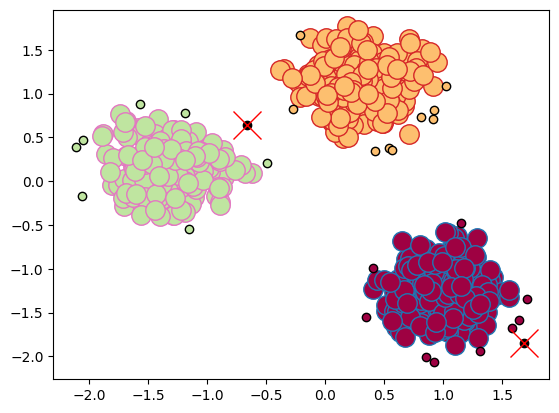

In [72]:
#label 개수만큼 색 팔레트
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

#core samples 거르는 mask
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

noise_samples_mask = np.zeros_like(labels, dtype=bool)
noise_samples_mask[labels == -1] = True

#print(k, col) #0 -> 색, 1-> 색,,,
for k, color in zip(unique_labels, colors):

  #noise 데이터 (k == -1)이면 color를 black(0,0,0,1)로 지정
  if k==-1:
    color = [0,0,0,1]

  #현재 k값과 같은 label만 거르는 mask
  class_member_mask = labels == k

  #현재 polt 그리려는 데이터 & core sample인 경우
  data = X[class_member_mask & core_samples_mask]

  plt.plot(
      data[:, 0], data[:, 1], 'o',
      markerfacecolor=tuple(color),
      markersize=14
  )

  data = X[class_member_mask & ~core_samples_mask]

  plt.plot(
      data[:, 0], data[:, 1], 'o',
      markerfacecolor=tuple(color),
      markeredgecolor='k',
      markersize=6
  )

  data = X[class_member_mask & noise_samples_mask]

  plt.plot(
      data[:,0], data[:,1], 'x',
      markerfacecolor=tuple(color),
      markeredgecolor='red',
      markersize=20
  )

In [74]:
colors

[(np.float64(0.6196078431372549),
  np.float64(0.00392156862745098),
  np.float64(0.25882352941176473),
  np.float64(1.0)),
 (np.float64(0.9934640522875817),
  np.float64(0.7477124183006535),
  np.float64(0.4352941176470587),
  np.float64(1.0)),
 (np.float64(0.7477124183006538),
  np.float64(0.8980392156862746),
  np.float64(0.6274509803921569),
  np.float64(1.0)),
 (np.float64(0.3686274509803922),
  np.float64(0.30980392156862746),
  np.float64(0.6352941176470588),
  np.float64(1.0))]

In [69]:
data

array([[-0.66268564,  0.63857958],
       [ 1.6820866 , -1.84957943]])